# Metodos de Segmentación / Clustering

## Preparación y configuración inicial de la rutina

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs # para generar la simulación de cluster

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

* Simulación de datos

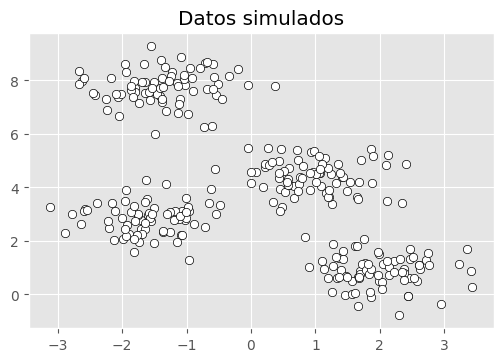

In [2]:
# Simulación de datos porque no tenemos datos (podríamos cargarlos)
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300,
        n_features   = 2,
        centers      = 4,
        cluster_std  = 0.60,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

## Definición

El algoritmo **K-means** es un método de agrupamiento que agrupa datos en k grupos basados en sus características. 

El objetivo es asignar cada dato a un grupo de manera que la suma de las distancias cuadráticas entre los datos y el centroide de su grupo sea mínima

### Asignación de Puntos a Clusters

**Distancia Euclidiana**: 

La distancia entre un punto $x_i$ y un centroide $c_j$ se calcula utilizando la fórmula de la distancia euclidiana

$dist(x_i,c_j) = \sqrt{\sum_{d=1}^{D}{({x}_{i,d} - {c}_{j,d})^2 }}$ 

donde $D$ es la dimensión de los datos.

In [3]:
def distancia_euclidiana(x, centroide):
    return np.sqrt(np.sum((x - centroide)**2))

**Asignación del Punto al Cluster más Cercano**: 

El punto $x_i$ se asigna al cluster cuyo centroide $c_i$ minimiza la distancia euclidiana 

$label(x_i) = \text{arg min}_j dist(x_i,c_j)$

In [4]:
def asignar_clusters(X, centroides):
    distancias = np.linalg.norm(X - centroides[:, np.newaxis], axis=2)
    labels = np.argmin(distancias, axis=0)
    return labels

### Actualización de Centroides

**Actualización del Centroide**: 

El nuevo centroide $c`_j$ para un cluster $j$ se calcula tomando la media de todos los puntos asignados a ese cluster 

$c`_j = \frac{1}{N_j}\sum_{i=1}^{N_j}{x_i}$ 

donde $N_j$ es el número de puntos asignados al cluster $j$

In [5]:
def actualizar_centroides(X, labels, k):
    nuevos_centroides = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return nuevos_centroides

**Verificación de Convergencia**: 

El algoritmo itera entre la asignación de puntos a clusters y la actualización de centroides hasta que los centroides no cambien significativamente entre iteraciones.

### Algoritmo Kmeans con las funciones creadas

In [6]:
def k_means(X, k, max_iter=100):
    # Inicializar centroides aleatorios
    centroides = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iter):
        # Asignar puntos a clusters
        labels = asignar_clusters(X, centroides)

        # Actualizar centroides
        nuevos_centroides = actualizar_centroides(X, labels, k)

        # Verificar convergencia
        if np.all(centroides == nuevos_centroides):
            break

        centroides = nuevos_centroides

    return labels, centroides

In [10]:
# hiperparametros
# Número de clusters (k)
k = 5

In [11]:
# Aplicar K-means
labels, centroides = k_means(X, k)

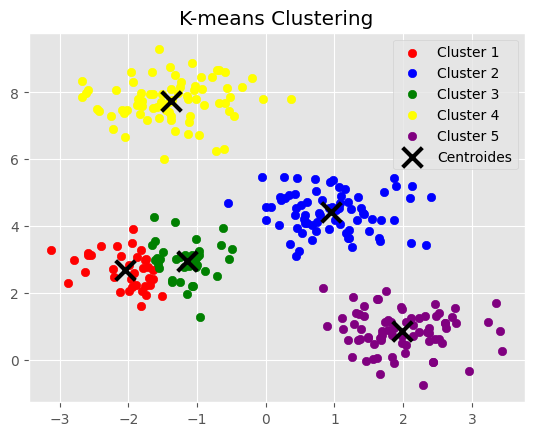

In [12]:
# Visualizar los resultados
colors = ['Red', 'Blue','Green','Yellow','Purple','Orange','Pink','Brown','Gray','White']
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.scatter(
    centroides[:, 0], 
    centroides[:, 1], 
    marker='x', 
    s=200, 
    linewidths=3, 
    color='black', 
    label='Centroides'
    )
plt.legend()
plt.title('K-means Clustering')
plt.show()

## Uso de libreria Scikit learn



Con la clase sklearn.cluster.KMeans de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo k-means. Entre sus parámetros destacan:

* n_clusters: determina el número  K
  de clusters que se van a generar.
* init: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
* n_init: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.
* max_iter: número máximo de iteraciones permitidas.
* random_state: semilla para garantizar la reproducibilidad de los resultados.

In [13]:
# Escalado de datos (procesamiento a datos numericos)
# ==============================================================================
X_scaled = scale(X)

In [14]:
# Modelo
# ==============================================================================

modelo_kmeans = KMeans(
    n_clusters=4, # cantidad de cluster
    n_init=25, # iteraciones
    random_state=123 # semilla aleatoria
    ) #objeto modelo


In [15]:
modelo_kmeans.fit(X=X_scaled)# ajuste del modelo


KMeans(n_clusters=4, n_init=25, random_state=123)

El objeto devuelto por KMeans() contiene entre otros datos: la media de cada una de las variables para cada cluster (cluster_centers_), es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación (.labels_) y la suma total de cuadrados internos de todos los clusters (.inertia_).

***Número de clusters***

Al tratarse de una simulación, se conoce el verdadero número de grupos (4) y a cuál de ellos pertenece cada observación. Esto no sucede en la mayoría de casos prácticos, pero es útil como ejemplo ilustrativo cómo funciona K-means.

In [16]:
# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

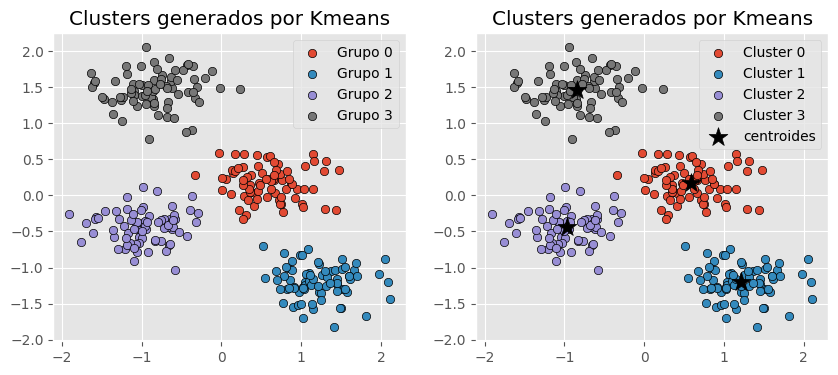

In [17]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

In [18]:
# Matriz de confusión: grupos originales vs clusters creados
# ==============================================================================
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,75,0,0,0
1,0,75,0,0
2,0,0,75,0
3,0,0,0,75


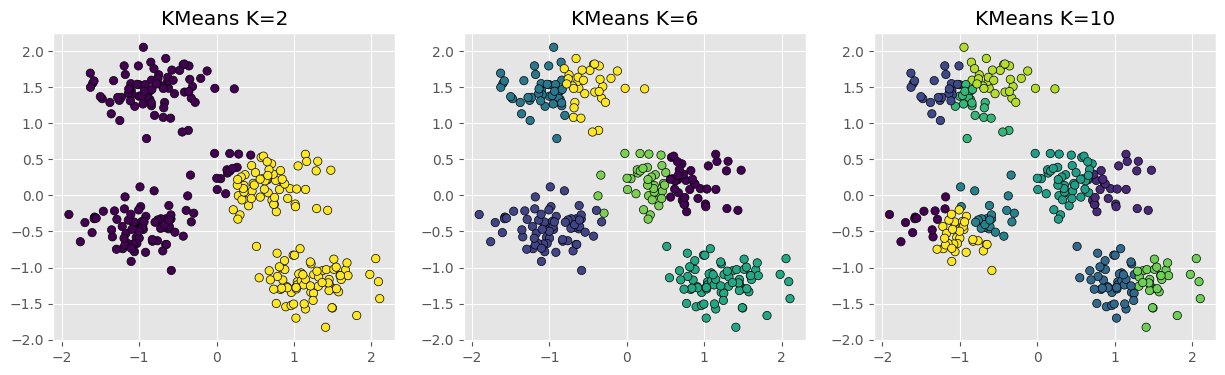

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1],
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1],
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

# Resultados para K = 10
# ==============================================================================
y_predict = KMeans(n_clusters=10, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[2].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1],
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[2].set_title('KMeans K=10');

## Métricas para identificar el número 'óptimo' de cluster

### El método de Elbow

El **método del codo (Elbow Method)** se utiliza para encontrar el número óptimo de clusters (k) en un algoritmo de agrupamiento, como K-means. 

La idea principal es ajustar el modelo para diferentes valores de k y luego observar cómo disminuye la variabilidad total (inercia o suma de cuadrados dentro del cluster) a medida que k aumenta. 

El punto en el que la disminución se desacelera, formando un "codo" en el gráfico de la variabilidad frente a k, se considera un indicador del número óptimo de clusters.

La fórmula para la variabilidad total (o inercia) es la suma de los cuadrados de las distancias euclidianas entre cada punto y el centroide de su cluster asignado. 

Donde tenemos que  :

* X como la matriz de datos
* C como la matriz de centroides 
* L como el vector de asignaciones de clusters para cada punto
* I como la inercia  



Y se puede expresar matemáticamente como: 

$I = \sum_{i=1}^{n}{}\sum_{j=1}^{k}{d(x_i,c_j)^2}$ 

Donde:

* $n$ es el número de puntos.
* $k$ es el número de clusters.
* $x_i$  es el i-ésimo punto.
* $c_j$ es el j-ésimo centroide.
* $d(x_i,c_j)$ es la distancia euclidiana entre $x_i$ y $c_j$
* La doble suma se realiza sobre todos los puntos y todos los clusters.

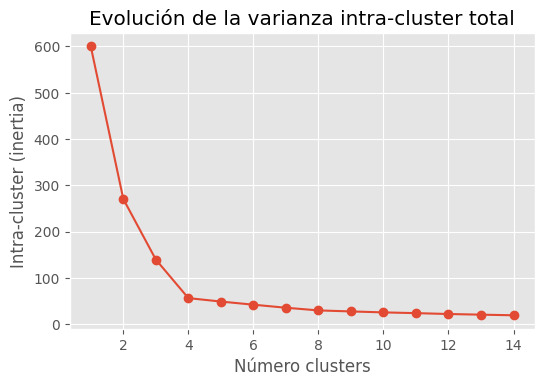

In [20]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

### Método silhouette

El método silhouette es otra técnica utilizada para evaluar la calidad de un agrupamiento (clustering) y determinar el número óptimo de clusters en un conjunto de datos. 

El coeficiente silhouette mide cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). 

El coeficiente silhouette para un punto de datos $i$ se calcula mediante la siguiente fórmula:

Donde:

$S(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}$ 

* $S(i)$ es el coeficiente silhouette para el punto $i$.
* $a(i)$ es la distancia media del punto $i$ a los demás puntos en el mismo cluster (cohesión).
* $b(i)$ es la distancia media más pequeña del punto $i$ a los puntos en un cluster diferente (separación).

El coeficiente silhouette varía entre -1 y 1. Un valor alto indica que el objeto está bien emparejado con su propio cluster y mal emparejado con clusters vecinos.

El método silhouette se utiliza para diferentes valores de $k$ (número de clusters) y se busca el valor de $k$ que maximiza el coeficiente silhouette promedio sobre todos los puntos. El valor de $k$ que proporciona el máximo coeficiente silhouette se considera el número óptimo de clusters.

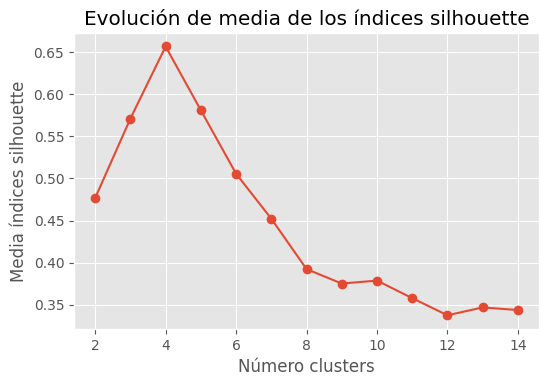

In [21]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');